In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

Bity oraz kubity przechowywane będą w tzw. rejestrach.  
Inicjalizacja rejestru to określenie zestawu kubitów lub klasycznych bitów, na których będziemy działać.  
Cały układ (kubity + bity + bramki kwantowe + urządzenia pomiarowe) będzie stanowił obwód kwantowy (circuit).  
Inicjalizujemy obwód, podając jakie kubity i bity do niego należą.  

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

circuit = QuantumCircuit(qr, cr)

Obwód możemy wyświetlić z różnymi ustawieniami...

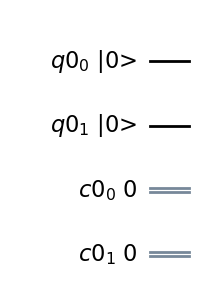

In [3]:
circuit.draw(initial_state=True, output="mpl", cregbundle=False)

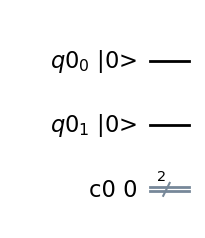

In [4]:
# Domyślnie Qiskit łączy na rysunku bity klasyczne (ClassicalRegister) w jedną linię z adnotacją ile jest tam bitów - oszczędność miejsca.
circuit.draw(initial_state=True, output="mpl")

Dodajmy do obwodu bramki.

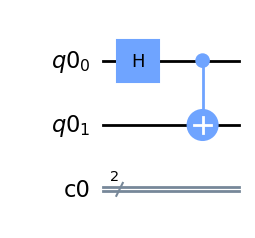

In [5]:
# Chcemy uzyskać stan splątany
# Najpierw działamy bramką Hadamarda, a następnie CNOT
circuit.h(qr[0])            # bramka Hadamarda jest jednokubitowa
circuit.cx(qr[0],qr[1])     # bramka CNOT działa na dwa kubity jednocześnie,
                            # odpowiednik IF..., THEN...

circuit.draw(output="mpl")

Ostatni etap - dodanie pomiaru do obwodu.

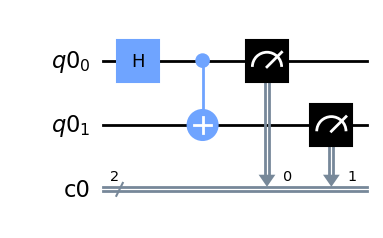

In [6]:
# Dodajemy pomiar do obwodu (na razie dodajemy informację jaki będzie pomiar, jeszcze nie wykonujemy właściwego mierzenia)
circuit.measure([0,1], [0,1]) # qubits [0,1] are measured and results are stored in classical bits [0,1] in order
circuit.draw(output='mpl')

Aby poznać wynik działania obwodu, trzeba puścić symulację.  
Można to zrobić lokalnie albo na komputerze kwantowym IBM.  
Użyjemy najpierw standardowego symulatora 'qasm_simulator', który ma za zadanie odtworzyć zachowanie prawdziwego urządzenia pomiarowego.  
Lista dostępnych symulatorów i ich własności jest on-line:  https://qiskit.github.io/qiskit-aer/tutorials/1_aer_provider.html

In [7]:
# Określenie, którego symulatora chcemy używać
simulator = Aer.get_backend('qasm_simulator')

# Przeprowadzenie symulacji
result = execute(circuit, backend=simulator).result()
result

Result(backend_name='qasm_simulator', backend_version='0.12.0', qobj_id='', job_id='7579ee89-261b-4663-a9bd-d62557f33613', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 500, '0x0': 524}), header=QobjExperimentHeader(creg_sizes=[['c0', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=2, name='circuit-114', qreg_sizes=[['q0', 2]]), status=DONE, seed_simulator=773911715, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'sample_measure_time': 0.0012991, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 12, 'fusion': {'enabled': False}}, time_taken=0.0031205)], date=2024-03-13T22:44:43.641258, status=COMPLETED, header=None, metadata={'parallel_experiments': 1, 'omp_enabled': True, 'max_memory_mb': 65

Ostatecznie możemy wyświetlić wyniki pomiarów na obwodzie.

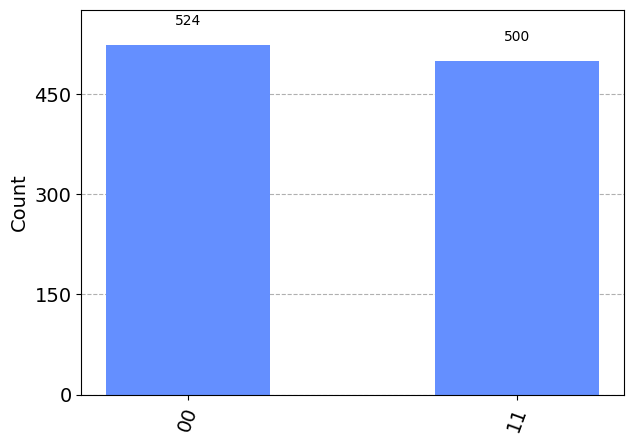

In [8]:
plot_histogram(result.get_counts(circuit))